In [ ]:
from PIL import Image  
import numpy as np
import cv2
import torch.nn as nn
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import skimage.measure
import math
from torchvision import transforms



In [ ]:
im_gray = Image.open('./bleach.png').convert('L') # read gray scale image
resize = transforms.Resize([64,64])
im = resize(im_gray)
#im = Image.open("resizedImg.png")     
img = np.array(im,dtype='float32')      # image to numpy


[[  0.   7.  47. ...   0.   0.   0.]
 [  0.   0.  40. ...  32.  11.   0.]
 [  0.   0.   0. ...  11.  16.   0.]
 ...
 [  0.  19.  50. ...   0.   0.   0.]
 [  0.   0.   0. ...  46.   0.   0.]
 [  0.   0.   0. ... 130.   3.   0.]]


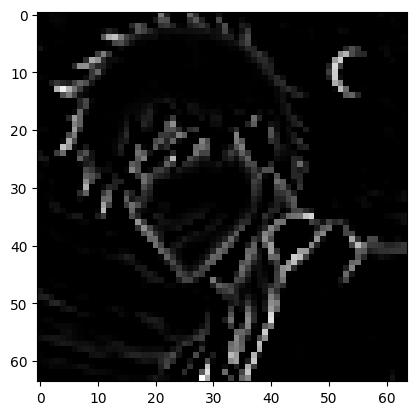

In [ ]:

img_pad = np.pad(img,((2,2),(2,2)),'edge')   #padding process
img_pad = torch.from_numpy(img_pad.reshape((1, 1, img_pad.shape[0], img_pad.shape[1]))) #padding_numpy to padding_tensor

weight = torch.tensor([[-0.0625, -0.125, -0.0625], [-0.25, 1, -0.25], [-0.0625, -0.125, -0.0625]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)
bias = torch.tensor([-0.75], dtype=torch.float32)

conv = torch.nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, dilation=2, stride=1, bias=True)
conv.weight = torch.nn.Parameter(weight)
conv.bias = torch.nn.Parameter(bias)

conv_layer0 = conv(img_pad)
conv_layer0 = F.relu(conv_layer0)

conv_layer0_img = conv_layer0.data.squeeze().numpy() # tensor result to image format
plt.imshow(conv_layer0_img, cmap='gray')

conv_layer0_array_f = conv_layer0.detach().numpy()
conv_layer0_array_f = np.reshape(conv_layer0_array_f, (64,64))
conv_layer0_array = conv_layer0_array_f * 16

output = ''
for i in range(0, 64):
  for j in range(0, 64):
    data = int(conv_layer0_array[i][j])
    output = output + str(bin(data)[2:].zfill(13)) + '\n'

print(conv_layer0_array)
f=open("layer0_golden.dat","w")
f.write(output)
f.close()

In [ ]:
Max_pool = skimage.measure.block_reduce(conv_layer0_array_f, (2,2), np.max)
Max_pool = np.ceil(Max_pool)
Max_pool = Max_pool*16

output2 = ''
for i in range(0, 32):
  for j in range(0, 32):
    data2 = bin(int(Max_pool[i][j]))[2:].zfill(13)
    output2 = output2 + str(data2) + '\n'

f=open("layer1_golden.dat","w")
f.write(output2)
f.close()

